In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

import sklearn
import brainiak
import nilearn as nl
from nilearn import image, plotting, input_data

from scipy.spatial import distance

from utils import *

In [2]:
from sklearn.linear_model import LogisticRegression

pd.options.display.max_rows = 200

# load

In [3]:
def read_logfile(sub_num):
  """ 
  read psychopy logifle into dataframe
  """
  # initialize dataframe
  df = pd.DataFrame(columns=['tstamp','logdata'])
  df = df.astype({'tstamp':float})
  # open logfile
  fpath = 'behav/silvy_buckets/sub%iday2/%i_viewing.log'%(100+sub_num,sub_num)
  f = open(fpath, "r")
  # loop over logfile rows
  for x in f:
    tstamp,B,C = x.split('\t')
    tstamp = float(tstamp)
#     df.loc[tstamp,'logtype'] = B[:-1]
    df.loc[tstamp,'logdata'] = C[:-1]
    df.loc[tstamp,'tstamp'] = tstamp
  return df

def reindex_and_TR_column(df):
  TR_rate = 1.5
  # first TR
  first_TR_tstamp = df[df.logdata=='Keypress: equal'].iloc[0].tstamp
  # center tstamps on first TR
  df.tstamp = df.tstamp-first_TR_tstamp
  # include TR column
  df['TR'] = np.ceil(df.tstamp/TR_rate)
  df = df.astype({'TR':int})
  # remove negative TRs
  df = df[df.TR>-1]
  # reindex by row number
  df.index = np.arange(len(df))
  return df

In [10]:
vid_strL = ['vid1a','vid1b','vid2','vid3','vid4','vid5']
timing_df_row_L = []

for sub_num in SUB_NS[:3]:
  ## read dataframe
  df = read_logfile(sub_num)
  df = reindex_and_TR_column(df)
  for vid_str in vid_strL:
    print(sub_num,vid_str)
    ## extract onset TR for wedding string
    TR_vals = df[df.logdata == '%s: autoDraw = True'%vid_str].TR.values
    timing_df_row = pd.DataFrame.from_dict({
      'sub_num':np.repeat(sub_num,10),
      'vid_str':np.repeat(vid_str,10),
      'wedding_num':np.arange(1,11),
      'onset_TR':TR_vals
    })
    timing_df_row_L.append(timing_df_row)



30 vid1a
30 vid1b
30 vid2
30 vid3
30 vid4
30 vid5
31 vid1a
31 vid1b
31 vid2
31 vid3
31 vid4
31 vid5
32 vid1a
32 vid1b
32 vid2
32 vid3
32 vid4
32 vid5


In [ ]:
timing_df = pd.concat(timing_df_row_L)
timing_df

,sub_num,vid_str,wedding_num,onset_TR
0,30,vid1a,1,108
1,30,vid1a,2,204
2,30,vid1a,3,300
3,30,vid1a,4,395
4,30,vid1a,5,492
5,30,vid1a,6,588
6,30,vid1a,7,684
7,30,vid1a,8,780
8,30,vid1a,9,876
9,30,vid1a,10,973


In [28]:
vid_strL = ['vid1a','vid1b','vid2','vid3','vid4','vid5']
vid_str = 'vid1a'
print(df[df.logdata == '%s: autoDraw = True'%vid_str].TR.values)

[109 204 300 396 492 589 685 781 877 974]


In [22]:
df.iloc[200:400]

,tstamp,logdata,TR
200,185.9828,Keypress: equal,124
201,187.3792,vid1a: autoDraw = False,125
202,187.3958,vid1b: autoDraw = True,125
203,187.4826,Keypress: equal,125
204,188.9828,Keypress: equal,126
205,190.4824,Keypress: equal,127
206,191.9822,Keypress: equal,128
207,193.4828,Keypress: equal,129
208,194.0960,Set vid1b finished,130
209,194.9822,Keypress: equal,130


In [20]:
df.loc[259:405]

,tstamp,logdata,TR
259,260.3951,vid5: autoDraw = True,174
260,260.9823,Keypress: equal,174
261,262.4816,Keypress: equal,175
262,263.9816,Keypress: equal,176
263,265.4821,Keypress: equal,177
264,266.9820,Keypress: equal,178
265,268.4818,Keypress: equal,179
266,269.9815,Keypress: equal,180
267,271.4821,Keypress: equal,181
268,272.9818,Keypress: equal,182


the first 26 seconds are intro, followed by 9 seconds start-event, 17 seconds campfire or flower (depending on label in pkl), 23 seconds coin or torch, 24 seconds egg or painting, and remainder gifts. 

In [4]:
def include_state_column(df):
  """ 
  include column "state" which indicates which stimulus is being shown
  ** NB first and last wedding not included (10/12 weddings labeled)
  """
  df['state'] = np.nan
  vid_strL = ['vid1a','vid1b','vid2','vid3','vid4','vid5']
  for vid_str0,vid_str1 in zip(vid_strL[:-1],vid_strL[1:]):
    vid_start_idx = df[df.logdata == '%s: autoDraw = True'%vid_str0].index
    vid_end_idx = df[df.logdata == '%s: autoDraw = True'%vid_str1].index
    for trial_num in range(10):
      df.loc[vid_start_idx[trial_num]:vid_end_idx[trial_num],'state']=vid_str0
  return df


In [5]:
def load_logdf(sub_num):
  """ 
  wrapper for loading subject experiment timing info
  ** NB excludes first and last wedding
  """ 
  ## read psychopy log file into dataframe
  df,first_TR_tstamp = read_logfile(sub_num)
  ##
  return df
  ##
  df = reformat_index(df,first_TR_tstamp)
  ##
  df = include_state_column(df)
  ##
  df = include_wed_and_nors_columns(df)
  ## leave only TRs where wedding states are being shown
  df = df[df.state.notna()]
  return df


In [10]:
L = []
for sub_num in SUB_NS:
  sub_roi = load_sub_roi(sub_num,'videos',ROI_NAME_L[0])
  df2,_ = read_logfile(sub_num)
  df_ = df2[df2.logdata == 'Keypress: equal']
  L.append(df_)
  print(sub_roi.shape,df_.shape)

(1168, 6170) (1165, 3)
(1166, 6170) (1165, 3)
(1168, 6170) (1165, 3)
(1167, 6170) (1165, 3)
(1166, 6170) (1165, 3)
(1168, 6170) (1165, 3)
(1166, 6170) (1165, 3)
(1167, 6170) (1165, 3)
(1166, 6170) (1165, 3)


In [10]:
df

,tstamp,logtype,logdata
183.0726,183.073,EXP,Created vid3 = MovieStim3(__class__=<class 'ps...
183.6144,183.614,EXP,Created vid4 = MovieStim3(__class__=<class 'ps...
184.0772,184.077,EXP,Created vid5 = MovieStim3(__class__=<class 'ps...
184.2001,184.2,EXP,window1: recordFrameIntervals = False
184.2035,184.203,DATA,Keypress: equal
184.2058,184.206,DATA,Keypress: equal
184.2108,184.211,EXP,vid5: autoLog = True
187.0435,187.043,EXP,window1: recordFrameIntervals = False
188.9871,188.987,DATA,Keypress: equal
188.9894,188.989,DATA,Keypress: equal


In [189]:
df
df['state'] = np.nan

t0_L = df[df.logdata.str[:len('vid5: autoDraw = True')] == 'vid5: autoDraw = True'].index

state_len = 18
for t0 in t0_L:
  print(t0)
  t1 = t0+state_len
  print(df.iloc[t0].logdata)
  print(df.iloc[t1-5].logdata)

# df.TR.unique()


259
vid5: autoDraw = True
Set vid5 finished
405
vid5: autoDraw = True
Set vid5 finished
554
vid5: autoDraw = True
Set vid5 finished
702
vid5: autoDraw = True
Set vid5 finished
850
vid5: autoDraw = True
Set vid5 finished
999
vid5: autoDraw = True
Set vid5 finished
1148
vid5: autoDraw = True
Keypress: equal
1298
vid5: autoDraw = True
Created sequence: random, trialTypes=1, nReps=1, seed=None
1442
vid5: autoDraw = True
Keypress: equal
1592
vid5: autoDraw = True
Keypress: equal


In [ ]:

vid_strL = ['vid1a','vid1b','vid2','vid3','vid4','vid5']
for vid_str0,vid_str1 in zip(vid_strL[:-1],vid_strL[1:]):
  vid_start_idx = df[df.logdata == '%s: autoDraw = True'%vid_str0].index
  vid_end_idx = df[df.logdata == '%s: autoDraw = True'%vid_str1].index
  for trial_num in range(10):
    df.loc[vid_start_idx[trial_num]:vid_end_idx[trial_num],'state']=vid_str0

In [ ]:

def include_wed_and_nors_columns(df):
  """ 
  at the beginning of each trial, psychopy preloads the videos that will be shown in that trial
  from the video .mp3 file names, I extract the wedding number and path
  from the path I infer north-or-south
  I then populate every row within that trial with these info
  ** NB last wedding not included (11/12 weddings labeled)
  """
  # North paths
  path1 = ['1a','1b','2a','3a','4a','5']
  path2 = ['1a','1b','2b','3b','4b','5']
  # South paths
  path3 = ['1a','1b','2a','3b','4a','5']
  path4 = ['1a','1b','2b','3a','4b','5']
  ## initialize columns
  df['wed'] = 99
  df['NorS'] = ''
  ## find rows corresponding to trial start (preloading videos)
  begin_trial_idxL = df[df.logdata.str[:len("Created vid1a = ")]=="Created vid1a = "].index
  ## loop over trials
  for begin_trial_idx,end_trial_idx in zip(begin_trial_idxL[:-1],begin_trial_idxL[1:]):
    ## extract rows containing preloading, and use .str operations to clean
    logdata_trial_info = df.iloc[begin_trial_idx:begin_trial_idx+6]
    logdata_trial_info = logdata_trial_info.logdata.str.split(',').str[5].str.split('/').str[1]
    ## further clean
    wed_int = int(logdata_trial_info.str.split('.').str[0].values[0].split('-')[1])
    path = logdata_trial_info.str.split('.').str[1].values
    ## decide NorS label based on path
    if np.array_equal(path,path1) or np.array_equal(path,path2):
      NorS_str = 'N'
    elif np.array_equal(path,path3) or np.array_equal(path,path4):
      NorS_str = 'S'
    else:
      assert False
    ## insert into dataframe
    df.loc[begin_trial_idx:end_trial_idx,'wed'] = wed_int
    df.loc[begin_trial_idx:end_trial_idx,'NorS'] = NorS_str
  return df

In [8]:
sub_num = 33
logdf = load_logdf(sub_num)


In [135]:
pd.options.display.max_rows = 200
logdf.iloc[100:250]

,tstamp,logtype,logdata,TR,state,wed,NorS
361,366.875,EXP,vid2: autoDraw = True,226,vid2,28,N
362,367.285,DATA,Keypress: equal,226,vid2,28,N
363,368.784,DATA,Keypress: equal,227,vid2,28,N
364,370.286,DATA,Keypress: equal,228,vid2,28,N
365,371.784,DATA,Keypress: equal,229,vid2,28,N
366,373.282,DATA,Keypress: equal,230,vid2,28,N
367,374.781,DATA,Keypress: equal,231,vid2,28,N
368,376.283,DATA,Keypress: equal,232,vid2,28,N
369,377.778,DATA,Keypress: equal,233,vid2,28,N
370,379.278,DATA,Keypress: equal,234,vid2,28,N


In [132]:
wed_arr = logdf.wed.unique()
wed_arr = wed_arr[wed_arr!=99]

wed_test = wed_arr[4]

wed_train_arr = wed_arr[wed_arr != wed_test]

pd.options.display.max_rows = 99
logdf_train = logdf[logdf.wed.isin(wed_train_arr)]
logdf_train[logdf_train.wed==1]


,tstamp,logtype,logdata,TR,state,wed,NorS
187,189.21,EXP,vid1a: autoDraw = True,108,vid1a,1,N
188,190.287,DATA,Keypress: equal,108,vid1a,1,N
189,191.791,DATA,Keypress: equal,109,vid1a,1,N
190,193.287,DATA,Keypress: equal,110,vid1a,1,N
191,194.786,DATA,Keypress: equal,111,vid1a,1,N
192,196.3,DATA,Keypress: equal,113,vid1a,1,N
193,197.796,DATA,Keypress: equal,113,vid1a,1,N
194,199.296,DATA,Keypress: equal,114,vid1a,1,N
195,200.796,DATA,Keypress: equal,115,vid1a,1,N
196,202.295,DATA,Keypress: equal,116,vid1a,1,N


# load roi

In [32]:
def load_sub_roi(sub_num,task,roi_name):
  fpath = "sub-%i_task-%s_roi-%s.npy" %(sub_num,task,roi_name)
  return np.load('fmri_data/masked/'+fpath)

In [44]:
def get_xval_split_info(logdf):
  """
  returns 
    N_TR_train_L: TRs for training on North
    S_TR_train_L: TRs for training on South
    TR_test_L: TRs for testing
    label_test_L: label for testing TRs
  each is list len 10, containing the information for an iteration of xval 
  """
  
  wed_arr = logdf.wed.unique()
  wed_arr = wed_arr[wed_arr!=99]

  N_TR_train_L = []
  S_TR_train_L = []
  TR_test_L = []
  label_test_L = []
  
  for wed_num_test in wed_arr:
    ## training 
    # remove test wed from train_wed_arr
    wed_arr_train = wed_arr[wed_arr!=wed_num_test]
    # training subset of dataframe (entries with train wedding)
    logdf_train = logdf[logdf.wed.isin(wed_arr_train)]
    # training TRs
    N_TR_train = logdf_train[logdf_train.NorS=='N'].TR.unique()
    S_TR_train = logdf_train[logdf_train.NorS=='S'].TR.unique()
    N_TR_train_L.append(N_TR_train)
    S_TR_train_L.append(S_TR_train)
    ## testing TRs
    logdf_test = logdf[(logdf.wed == wed_num_test)]
    TR_test = logdf_test.TR.unique()
    label_test = logdf_test.NorS.unique() 
    TR_test_L.append(TR_test)
    label_test_L.append(label_test[0])
  return N_TR_train_L,S_TR_train_L,TR_test_L,label_test_L
  

In [60]:
ROI_NAME_L

['rsherlockAvg_fc_thr5_pmc',
 'rsherlockAvg_fc_thr5_mpfc',
 'rsherlockAvg_fc_thr5_lTPJ',
 'rsherlockAvg_fc_thr5_rTPJ',
 'rsherlockAvg_fc_thr5_lSFG',
 'rsherlockAvg_fc_thr5_rSFG',
 'rhippocampusL_AAL',
 'rhippocampusR_AAL',
 'rhippocampusAAL']

In [82]:
""" 
CLASSIFIER CROSS VALIDATION
"""

fdir = 'fmri_data/xval/sweep1/'
task = 'videos'
roi_name = 'rsherlockAvg_fc_thr5_pmc'

for roi_name in ROI_NAME_L:
  print(roi_name)
  accL = []
  for sub_num in SUB_NS:
    print(sub_num)
    roi_act = load_sub_roi(sub_num,task,roi_name)
    sub_accL = []
    ## xval split
    for N_TR_train,S_TR_train,TR_test,label_test in zip(*get_xval_split_info(logdf)):
      # split roi act into train and test
      roi_act_N_train = roi_act[N_TR_train,:]
      roi_act_S_train = roi_act[S_TR_train,:]
      roi_act_test = roi_act[TR_test,:]
      # form classifier datasets
      X_train = np.concatenate([roi_act_N_train,roi_act_S_train])
      X_test = roi_act_test
      Y_train = np.concatenate([np.ones(len(roi_act_N_train)),np.zeros(len(roi_act_S_train))])
      Y_test = np.repeat(int(label_test == 'N'),len(X_test))
      clf = sklearn.linear_model.LogisticRegression(solver='liblinear').fit(X_train,Y_train)
      sub_accL.append(clf.score(X_test,Y_test))
      yhat = clf.predict_proba(X_test)
#       print(clf.score(X_test,Y_test),clf.score(X_train,Y_train))
    accL.append(sub_accL)

  fpath = fdir+'acc-%s'%roi_name
  np.save(fpath,np.array(accL))


rsherlockAvg_fc_thr5_pmc
30
31
32
33
34
35
36
37
38
rsherlockAvg_fc_thr5_mpfc
30
31
32
33
34
35
36
37
38
rsherlockAvg_fc_thr5_lTPJ
30
31
32
33
34
35
36
37
38
rsherlockAvg_fc_thr5_rTPJ
30
31
32
33
34
35
36
37
38
rsherlockAvg_fc_thr5_lSFG
30
31
32
33
34
35
36
37
38
rsherlockAvg_fc_thr5_rSFG
30
31
32
33
34
35
36
37
38
rhippocampusL_AAL
30
31
32
33
34
35
36
37
38
rhippocampusR_AAL
30
31
32
33
34
35
36
37
38
rhippocampusAAL
30
31
32
33
34
35
36
37
38


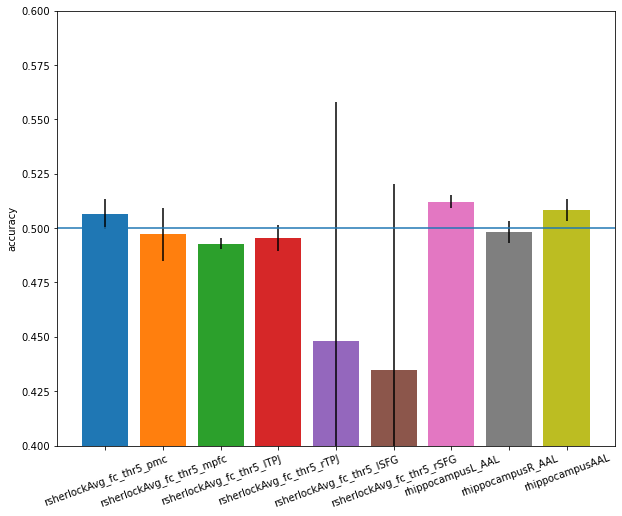

In [114]:
fdir = 'fmri_data/xval/sweep1/'

plt.figure(figsize=(10,8))
ax = plt.gca()
for idx,roi_name in enumerate(ROI_NAME_L):
  fpath = fdir+'acc-%s.npy'%roi_name
  acc = np.load(fpath)
  acc2 = acc.mean(0)
  M = acc2.mean()
  S = acc2.std()/np.sqrt(len(acc2))
  ax.bar(idx,M,yerr=S)
ax.set_ylim(0.4,0.6)
ax.axhline(0.5)
ax.set_xticks(range(9))
ax.set_xticklabels(ROI_NAME_L,rotation=20)
ax.set_ylabel('accuracy')

plt.savefig('figures/view_xval_acc')

In [266]:
def mov_avg(X,w):
  A = np.ones(len(X)-w)
  for i in range(len(X)-w):
    A[i] = X[i:i+w].mean()
  return A

In [273]:
yhat_pr = clf.predict_proba(roi_act)[:,1]
yhat_plt = mov_avg(yhat_pr,30)

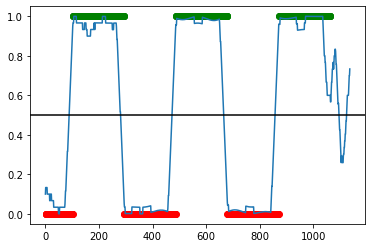

In [276]:
plt.plot(yhat_plt)
plt.scatter(NTR,np.ones(len(NTR)),c='g')
plt.scatter(STR,np.zeros(len(STR)),c='r')
plt.axhline(0.5,c='k')